In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")
programming_df = pd.read_csv("pldb.csv")
programming_df['languageRank'] += 1
programming_df.head()

,title,appeared,type,pldbId,rank,languageRank,factCount,lastActivity,exampleCount,bookCount,...,features.hasIds,ebook,features.hasExports,features.hasZippers,features.hasMonads,extensionOf,zulip,features.hasImplicitArguments,features.hasDynamicTyping,features.hasMethodChaining
0,Java,1995,pl,java,0,1.0,920,2022,20,401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JavaScript,1995,pl,javascript,1,2.0,818,2022,54,351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2,C,1972,pl,c,2,3.0,426,2022,26,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,1991,pl,python,3,4.0,691,2022,35,342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SQL,1974,queryLanguage,sql,4,5.0,324,2022,6,182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Interesting summary statistics

In [2]:
programming_df.describe()

,appeared,rank,languageRank,factCount,lastActivity,exampleCount,bookCount,paperCount,numberOfUsers,numberOfJobs,...,packageCount,indeedJobs.2017,subreddit.memberCount.2017,stackOverflowSurvey.2021.percentageUsing,stackOverflowSurvey.2021.fans,stackOverflowSurvey.2021.medianSalary,stackOverflowSurvey.2021.users,packageInstallCount,packageAuthors,versions.2007
count,4818.000000,4818.000000,4303.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4.818000e+03,4818.000000,...,4.800000e+01,48.000000,40.000000,38.000000,38.000000,38.000000,38.000000,1.100000e+01,4.000000,1.0
mean,1989.014944,2408.500000,2152.000000,31.250311,1998.455376,1.086966,1.878165,0.596098,1.505487e+04,399.992528,...,5.054317e+04,5653.187500,21017.075000,0.140789,9580.605263,63542.263158,11646.315789,9.574010e+10,5082.500000,2007.0
std,147.682103,1390.981129,1242.313433,52.797709,131.016472,3.261637,16.404652,3.576037,2.231984e+05,11900.085667,...,1.573366e+05,8593.256457,41007.310125,0.172319,10457.665846,13632.207824,14389.586396,2.974076e+11,5863.288298,NaN
min,-2700.000000,0.000000,1.000000,3.000000,-2700.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,2.600000e+01,1.000000,8.000000,0.010000,309.000000,32986.000000,437.000000,1.554909e+06,620.000000,2007.0
25%,1985.000000,1204.250000,1076.500000,8.000000,1993.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,1.041500e+03,188.250000,984.000000,0.020000,1525.250000,54049.000000,1735.500000,6.598390e+07,2096.000000,2007.0
50%,1998.000000,2408.500000,2152.000000,15.000000,2007.000000,0.000000,0.000000,0.000000,2.900000e+01,0.000000,...,4.230500e+03,1569.000000,4564.000000,0.055000,4455.500000,59454.000000,4418.000000,4.055259e+08,3005.500000,2007.0
75%,2012.000000,3612.750000,3227.500000,29.000000,2022.000000,1.000000,0.000000,0.000000,3.210000e+02,0.000000,...,1.353375e+04,6832.750000,18886.750000,0.235000,15653.250000,75659.500000,19575.250000,1.432467e+10,5992.000000,2007.0
max,2023.000000,4817.000000,4303.000000,920.000000,2023.000000,80.000000,401.000000,52.000000,7.179119e+06,771996.000000,...,1.029249e+06,32645.000000,197722.000000,0.640000,37008.000000,95000.000000,53587.000000,9.919540e+11,13699.000000,2007.0


**1-What are the top 20 country developed the most programming languages?**





<Axes: xlabel='country'>

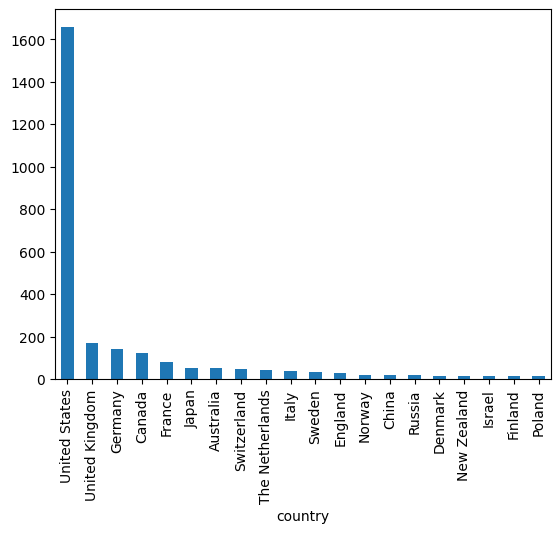

In [3]:
country_counts = programming_df['country'].value_counts()
country_counts= country_counts.drop('Various')
country_counts= country_counts.drop('Unknown')
country_counts.head(20).plot(kind='bar')

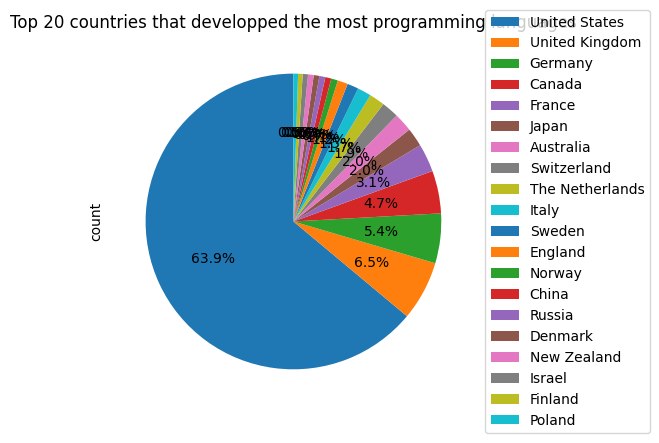

In [4]:
country_counts.head(20).plot(kind='pie', autopct='%1.1f%%', startangle=90, labeldistance=None, ylabel=None, title='Top 20 countries that developped the most programming languages').legend(loc='center left', bbox_to_anchor=(1, 0.5))

**2- In what year were the top 200 programming languages created?**

Correlation between the year and the programming lanugage rank:  0.15442016740516898


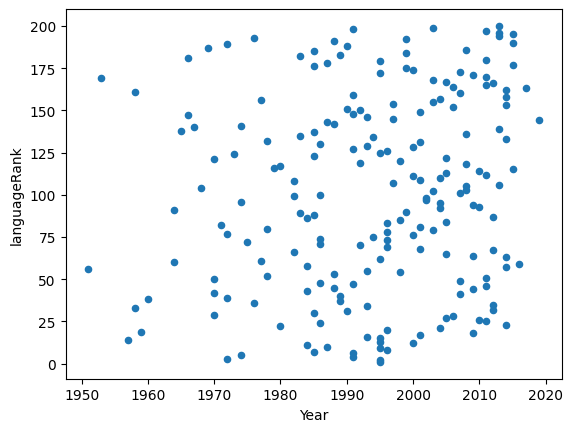

In [5]:
programming_df.sort_values(by=['languageRank'], inplace=True)
old_programming_languages = programming_df.head(200)
old_programming_languages
#scatter plot
year = old_programming_languages['appeared']
rank = old_programming_languages['languageRank']

df_full = pd.concat([year, rank], axis=1)
df_full.columns = ['Year','languageRank']

df_full.plot.scatter(x="Year",y="languageRank")
print("Correlation between the year and the programming lanugage rank: ",year.corr(rank))

**3- Using linear regression can I predict the rank of the top 200 programming languages?**

In [6]:
#removing categorical field
mask = old_programming_languages.dtypes == object
categorical_cols = old_programming_languages.columns[mask]
#print(categorical_cols)
df_cleaned = old_programming_languages.drop(columns=categorical_cols)
#removing obsolete fields
selected_columns = ['appeared', 'languageRank', 'factCount', 'bookCount','paperCount', 'numberOfUsers',
       'numberOfJobs','wikipedia.dailyPageViews']
df_cleaned.drop(columns=df_cleaned.columns.difference(selected_columns), inplace=True)
df_cleaned.dropna(inplace=True)
df_cleaned

,appeared,languageRank,factCount,bookCount,paperCount,numberOfUsers,numberOfJobs,wikipedia.dailyPageViews
0,1995,1.0,920,401,37,5550123,85206,5242.0
1,1995,2.0,818,351,48,5962666,63993,4264.0
2,1972,3.0,426,78,19,3793768,59919,6268.0
3,1991,4.0,691,342,52,2818037,46976,7204.0
4,1974,5.0,324,182,37,7179119,219617,3084.0
...,...,...,...,...,...,...,...,...
267,1999,192.0,32,4,5,2395,0,475.0
210,1976,193.0,116,0,0,1861,0,328.0
247,2013,196.0,112,0,0,5559,0,1.0
214,1991,198.0,126,0,0,453,0,18.0


## Predicting the language rank without using the featured selection

In [7]:
y = df_cleaned['languageRank']
X = df_cleaned.drop('languageRank', axis=1)
# print(X.head(5))
#splitting the dataset
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    #train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=42)

# making a linear progression
LR = LinearRegression()


LR.fit(train_X, train_y)
y_test_pred = LR.predict(test_X)
print(f"Accuracy of the linear regression model: {LR.score(test_X,test_y)*100}")


Accuracy of the linear regression model: 50.445041626112605


Visualisation

(-25.131089060019455, 197.25)

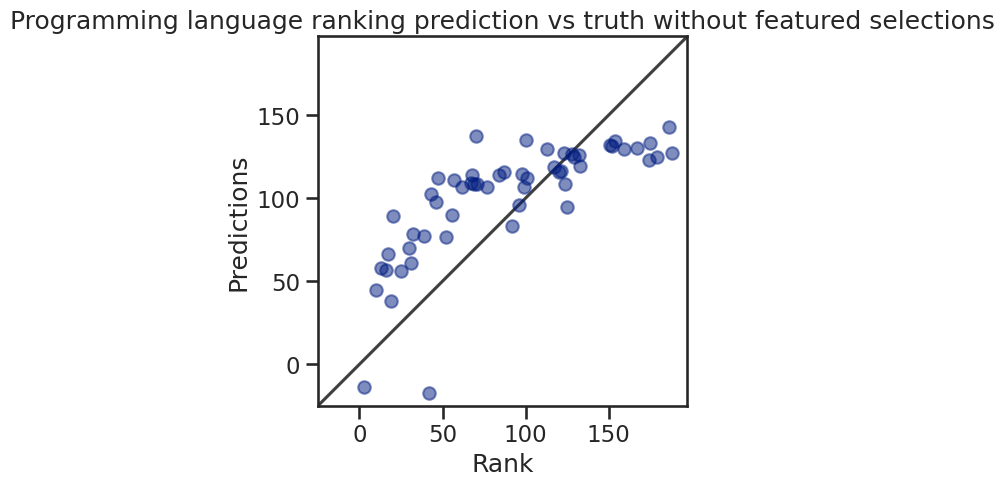

In [8]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
ax.scatter(test_y, y_test_pred, alpha=.5)

ax.set(xlabel='Rank', ylabel='Predictions',title='Programming language ranking prediction vs truth without featured selections');
# add a diagonal line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

# Featured selection

Doing featured selection to see which fields are the most important

In [9]:
# Backward Elimination
y = df_cleaned['languageRank']
X = df_cleaned.drop('languageRank', axis=1)
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()

    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
X_1

['factCount', 'wikipedia.dailyPageViews']


,const,factCount,wikipedia.dailyPageViews
0,1.0,920,5242.0
1,1.0,818,4264.0
2,1.0,426,6268.0
3,1.0,691,7204.0
4,1.0,324,3084.0
...,...,...,...
267,1.0,32,475.0
210,1.0,116,328.0
247,1.0,112,1.0
214,1.0,126,18.0


Linear regression model

In [10]:
#selecting the most impactful features
X_data = df_cleaned[selected_features_BE]

#splitting the dataset
train_X, test_X, train_y, test_y = train_test_split(X_data, y,
                                                    #train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=42)

# making a linear progression
LR = LinearRegression()

error_df = list()

LR.fit(train_X, train_y)
y_train_pred = LR.predict(train_X)
y_test_pred = LR.predict(test_X)
print(f"Accuracy of the linear regression model: {LR.score(test_X,test_y)*100}")
rmse = mean_squared_error(test_y, y_test_pred, squared=False)  # Calculate RMSE
print(f"RMSE: {rmse}")

Accuracy of the linear regression model: 50.1703911964434
RMSE: 36.863654746885665


Visualisation of the linear regression model

(-31.079829891105465, 197.25)

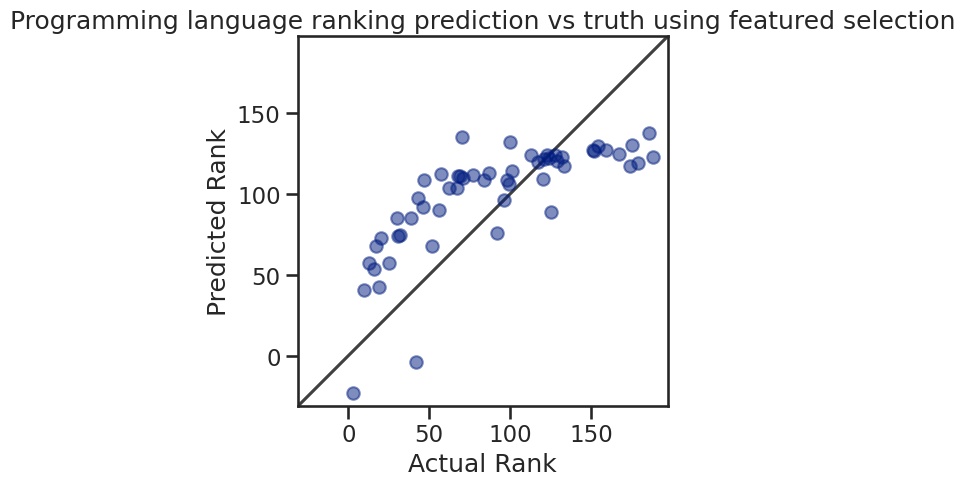

In [11]:

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
ax.scatter(test_y, y_test_pred, alpha=.5)

ax.set(xlabel='Actual Rank', ylabel='Predicted Rank',title='Programming language ranking prediction vs truth using featured selection');
# add a diagonal line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

#Using Xgboost




In [12]:
import xgboost as xgb
dtrain_reg = xgb.DMatrix(train_X, train_y)
dtest_reg = xgb.DMatrix(test_X, test_y)

params = {
       'objective': 'reg:squarederror',  # Regression task, using squared error as the loss function
       'eval_metric': 'rmse',  # Root Mean Squared Error for evaluation
       # Add other hyperparameters as needed, e.g., 'max_depth', 'learning_rate', etc.
   }

model = xgb.train(params, dtrain_reg, num_boost_round=100)  # Adjust num_boost_round as needed
predictions = model.predict(dtest_reg)
rmse = mean_squared_error(test_y, predictions, squared=False)  # Calculate RMSE
print(f"RMSE: {rmse}")

RMSE: 34.60339461658255


Visualization of the model using Xgboost

(-6.25, 213.05283942222596)

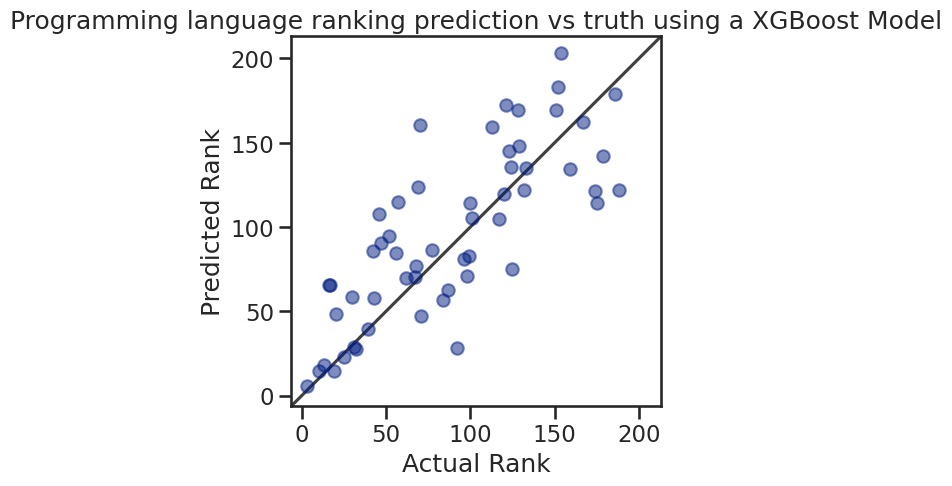

In [13]:

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
ax.scatter(test_y, predictions, alpha=.5)

ax.set(xlabel='Actual Rank', ylabel='Predicted Rank',title='Programming language ranking prediction vs truth using a XGBoost Model');
# add a diagonal line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


# Regression with log scale

In [14]:
y = df_cleaned['languageRank']
X = df_cleaned.drop('languageRank', axis=1)

# Apply log transformation to the target variable
log_y = np.log(y)

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, log_y, test_size=0.3, random_state=42)# Create a logistic regression model

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(train_X, train_y)

# Make predictions on the testing data
y_pred = model.predict(test_X)

# Exponentiate the predictions to get them back to the original scale
y_pred_original_scale = np.exp(y_pred)

# Evaluate the model using RMSE
rmse = mean_squared_error(np.exp(test_y), y_pred_original_scale, squared=False)
print(f"RMSE: {rmse}")

RMSE: 29.842586306182096


Visualization of the log scale

(-6.25, 197.25)

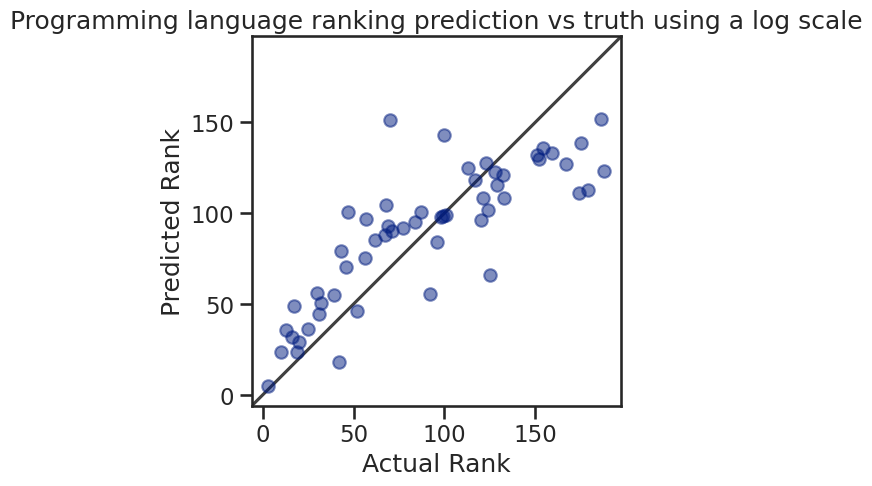

In [15]:

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
ax.scatter(np.exp(test_y), y_pred_original_scale, alpha=.5)

ax.set(xlabel='Actual Rank', ylabel='Predicted Rank',title='Programming language ranking prediction vs truth using a log scale');
# add a diagonal line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
